
# Introduction to Map Projections

Here, we will explore the concept of map projections through interactive examples of how they affect our maps. Projections are methods for representing the curved surface of the Earth on a flat map. Different projections are used depending on the purpose of the map, as each projection has its own set of advantages and disadvantages, including distortions of area, shape, distance, and direction.

Understanding map projections is crucial for cartographers, geographers, and anyone who works with geographic information systems (GIS). By the end of this activity, you will have a better understanding of how different projections can significantly alter the appearance of geographical features on a map.


In [1]:
# Let's import the needed libraries
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import cartopy
import cartopy.feature as cfeature

<div style="border: 2px solid #f0ad4e; border-radius: 5px; padding: 10px; background-color: #fcf8e3;">
    <strong>Heads Up! 🚨</strong><br>
    As we dive into this activity, we're going to check out how different projections can twist and turn our maps. Keep in mind, the projections we're messing with include a mix of the good, the bad, and the downright wonky. This is all in the name of learning, of course! When it's time to get serious and pick a projection for your own mapping ventures, make sure you do a little homework. Choose the best fit that complements the specific needs of your area and nails the goals of your map.
</div>



## The Importance of Choosing the Right Projection

Choosing the appropriate map projection is a fundamental aspect of cartography and geographic visualization. Each projection serves a specific purpose:

- **Conformal projections** preserve angles locally, making them ideal for navigation and weather maps.
- **Equal-area projections** preserve area, making them suitable for demographic and environmental studies.
- **Equidistant projections** preserve distances from one or two points to all other points, useful for certain types of analysis or planning.
- **Compromise projections** attempt to balance distortion in shape, area, distance, and direction, making them good for general world maps.

No single projection is best for all purposes, and the choice depends on the map's intended use and the geographic area it represents.

Below, we will create a global map and see how the choice of a projection affects various aspects of our map.

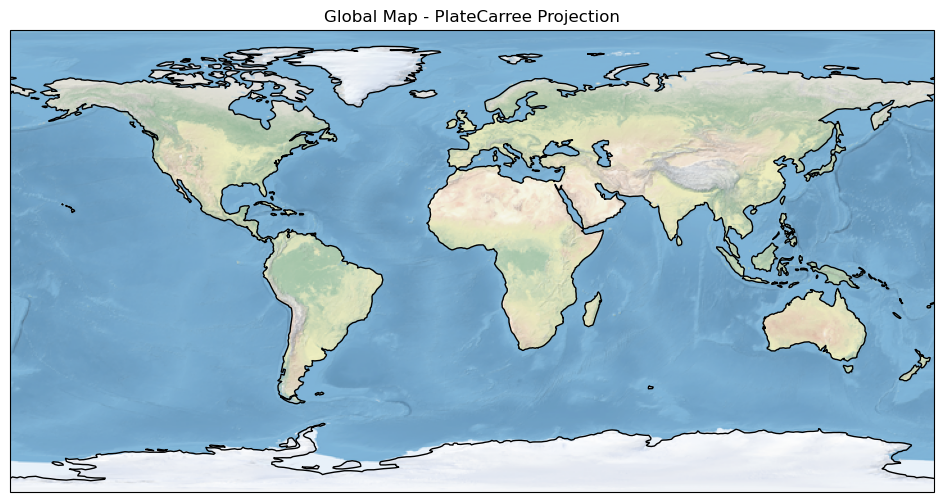

In [2]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import cartopy.feature as cfeature

# Function to plot a global map with the selected projection
def plot_global_map(projection):
    with map_output:
        clear_output(wait=True)  # Clear the previous plot
        plt.figure(figsize=(12, 6))

        if projection in ['PlateCarree', 'Mercator', 'Orthographic', 'Mollweide', 'Robinson', 
                          'AzimuthalEquidistant', 'LambertCylindrical', 'EckertIV', 'Gnomonic']:
            proj = getattr(ccrs, projection)()
        elif projection == 'Equidistant Cylindrical (Plate Carrée, Equator Centered)':
            proj = ccrs.PlateCarree()
        else:
            proj = ccrs.PlateCarree()  # Default to PlateCarree if something goes wrong

        ax = plt.axes(projection=proj)
        ax.stock_img()  # Add a background image
        ax.coastlines()  # Draw coastlines
        ax.set_global()  # Set the display to a global scale
        
        title = f"Global Map - {projection} Projection"
        plt.title(title)
        plt.show()

# Dropdown widget for selecting the projection
projection_selector_global = widgets.Dropdown(
    options=[
        'PlateCarree', 'Mercator', 'Orthographic', 'Mollweide', 'Robinson', 
        'Equidistant Cylindrical (Plate Carrée, Equator Centered)', 'AzimuthalEquidistant', 
        'LambertCylindrical', 'EckertIV', 'Gnomonic'
    ],
    value='PlateCarree',
    description='Projection:',
)

# Function to handle projection changes
def on_global_projection_change(change):
    plot_global_map(change['new'])

# Observe changes in the dropdown selection
projection_selector_global.observe(on_global_projection_change, names='value')

# Output widget to display the plots
map_output = widgets.Output()

# Display the widgets and the initial plot
display(projection_selector_global, map_output)
plot_global_map(projection_selector_global.value)


Now let's Zoom onto Finland and see how choice of various projections can affect our map of Finland:

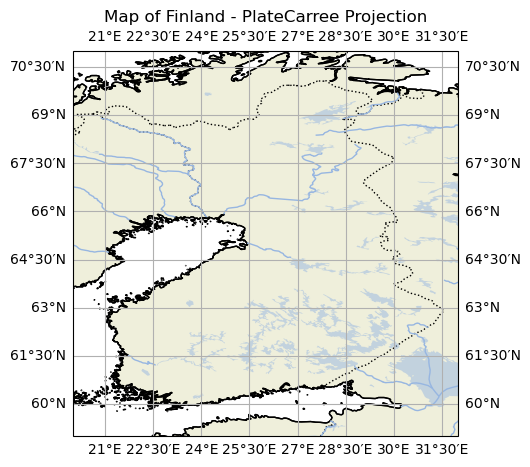

In [3]:
def plot_finland_map(projection, zone=None):
    with map_output:
        clear_output(wait=True)  # Clear the previous plot
        plt.figure(figsize=(10, 5))

        # Handling EPSG 3067 projection
        if projection == 'EPSG:3067':
            proj = ccrs.epsg('3067')
        elif projection == 'UTM':
            proj = ccrs.UTM(zone=zone, southern_hemisphere=False)
        elif projection == 'Equidistant Cylindrical (Plate Carrée, Equator Centered)':
            # Specifically using Equidistant Cylindrical projection centered on the equator
            proj = ccrs.PlateCarree(central_longitude=0)
        else:
            proj = getattr(ccrs, projection)()
        
        ax = plt.axes(projection=proj)
        ax.set_extent([20, 32, 59, 71], crs=ccrs.PlateCarree())
        ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
        ax.add_feature(cartopy.feature.LAND, edgecolor='black')
        ax.add_feature(cartopy.feature.COASTLINE)
        ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
        ax.add_feature(cartopy.feature.RIVERS)
        ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
        
        title = "Map of Finland"
        if projection.startswith('EPSG'):
            title += f" - {projection} Projection"
        elif zone:
            title += f" - UTM Zone {zone} Projection"
        else:
            title += f" - {projection} Projection"
        plt.title(title)
        plt.show()

# Dropdown widget for selecting the projection
projection_selector_finland = widgets.Dropdown(
    options=[
        'PlateCarree', 'Mercator', 'Orthographic', 'Mollweide', 'Robinson', 'UTM', 
        'EPSG:3067', 'Equidistant Cylindrical (Plate Carrée, Equator Centered)'
    ],
    value='PlateCarree',
    description='Projection:',
)

def on_projection_change_finland(change):
    if change['new'] == 'UTM':
        plot_finland_map('UTM', zone=35)
    elif change['new'] == 'EPSG:3067':
        plot_finland_map('EPSG:3067')
    elif change['new'] == 'Equidistant Cylindrical (Plate Carrée, Equator Centered)':
        plot_finland_map('Equidistant Cylindrical (Plate Carrée, Equator Centered)')
    else:
        plot_finland_map(change['new'])

projection_selector_finland.observe(on_projection_change_finland, names='value')


projection_selector_finland.observe(on_projection_change_finland, names='value')
map_output = widgets.Output()

display(projection_selector_finland, map_output)
plot_finland_map(projection_selector_finland.value)



## Discussion on Projection Choices

After exploring various map projections, consider the following questions:

- How do the shapes and sizes of continents change with different projections?
- Why might a cartographer choose one projection over another for a particular mapping project?
- What are the implications of projection choice for viewers' understanding of geographical relationships?

Discussing these questions will deepen our understanding of the practical considerations in selecting a map projection.
